In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [51]:
def parse_tables(file_path):
    """
    Parses the tables from the given file into a dictionary of pandas DataFrames.

    Args:
        file_path (str): Path to the file containing the tables.

    Returns:
        dict: A dictionary where the keys are table names and the values are DataFrames.
    """
    
    with open(file_path, 'r') as file:
        # Read the entire content of the file
        content = file.read()

    # Split the content by double newlines to separate the tables
    tables = content.strip().split('\n\n')

    # Initialize a dictionary to store DataFrames with table names as keys
    tables_dict = {}

    for table in tables:
        # Split the table content by lines
        lines = table.strip().split('\n')

        # Extract the table name from the first line
        table_name = lines[0].strip()

        # Extract the Hz information (metadata) from the second line
        hz = lines[1].strip()

        # Parse the column headers and units from the next three lines
        group_headers = lines[2].split(',')  # Group headers (first row)
        column_headers = lines[3].split(',')  # Column names (second row)
        units = lines[4].split(',')  # Units (third row)

        # Create a list to hold the full column names
        columns = []
        current_group = ""

        # Construct the full column names using group headers, column names, and units
        for group_header, column_header, unit in zip(group_headers, column_headers, units):
            if group_header.strip():  # Update the current group if it's not empty
                current_group = group_header.strip()
            if group_header.strip():  # Update the current group if the group header is not empty
                current_group = group_header.strip()
            full_column_name = ""
            if current_group:
                full_column_name += f"{current_group}:"
            full_column_name += f"{column_header.strip()}"
            if unit.strip():
                full_column_name += f" ({unit.strip()})"
            columns.append(full_column_name)

        # Parse the data rows starting from the 6th line onward
        data = [line.split(',') for line in lines[5:]]

        # Create a DataFrame for the current table
        df = pd.DataFrame(data, columns=columns)

        # Convert numeric columns to appropriate types
        df = df.apply(pd.to_numeric, errors='ignore')

        # Attach metadata (Hz information) to the DataFrame
        df.attrs['hz'] = hz

        # Store the DataFrame in the dictionary with the table name as the key
        tables_dict[table_name] = df
    
    return tables_dict

In [59]:
# Example usage
file_path = 'Taschi05.csv'  # Replace with your actual file path
tables_dict = parse_tables(file_path)

/tmp/ipykernel_1305380/2454532005.py:62: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [60]:
# Display the tables in the dictionary
for table_name, df in tables_dict.items():
    print(f"Table Name: {table_name}")
    print(f"Hz: {df.attrs['hz']}")
    print(f"Columns: {df.columns}")
    os.makedirs('csv', exist_ok=True)
    df.to_csv(f"csv/{table_name}.csv", index=False)  # Save the DataFrame to a CSV file
    print("\n" + "-"*50 + "\n")  # Separator between tables

Table Name: Joints
Hz: 200
Columns: Index(['Frame', 'Sub Frame', 'Tasch:HandOuter_Thumb:RX (deg)',
       'Tasch:HandOuter_Thumb:RY (deg)', 'Tasch:HandOuter_Thumb:RZ (deg)',
       'Tasch:LowerArm_HandOuter:RX (deg)',
       'Tasch:LowerArm_HandOuter:RY (deg)',
       'Tasch:LowerArm_HandOuter:RZ (deg)',
       'Tasch:LowerArm_HandOuter:RX (deg)',
       'Tasch:LowerArm_HandOuter:RY (deg)',
       'Tasch:LowerArm_HandOuter:RZ (deg)', 'Tasch:World_UpperArm:RX (deg)',
       'Tasch:World_UpperArm:RY (deg)', 'Tasch:World_UpperArm:RZ (deg)',
       'Tasch:World_UpperArm:TX (mm)', 'Tasch:World_UpperArm:TY (mm)',
       'Tasch:World_UpperArm:TZ (mm)'],
      dtype='object')

--------------------------------------------------

Table Name: Segments
Hz: 200
Columns: Index(['Frame', 'Sub Frame', 'Tasch:HandOuter:RX (deg)',
       'Tasch:HandOuter:RY (deg)', 'Tasch:HandOuter:RZ (deg)',
       'Tasch:HandOuter:TX (mm)', 'Tasch:HandOuter:TY (mm)',
       'Tasch:HandOuter:TZ (mm)', 'Tasch:LowerArm:R

In [61]:
trajectories = tables_dict["Trajectories"]
trajectories

,Frame,Sub Frame,Tasch:shoulder:X (mm),Tasch:shoulder:Y (mm),Tasch:shoulder:Z (mm),Tasch:shoulderElbowSupport:X (mm),Tasch:shoulderElbowSupport:Y (mm),Tasch:shoulderElbowSupport:Z (mm),Tasch:elbow:X (mm),Tasch:elbow:Y (mm),...,Tasch:elbowWrist:Z (mm),Tasch:Triangle1:X (mm),Tasch:Triangle1:Y (mm),Tasch:Triangle1:Z (mm),Tasch:Triangle2:X (mm),Tasch:Triangle2:Y (mm),Tasch:Triangle2:Z (mm),Tasch:ThumbTip:X (mm),Tasch:ThumbTip:Y (mm),Tasch:ThumbTip:Z (mm)
0,1,0,-42.1902,571.770,553.388,5.96244,623.124,376.883,32.5839,671.099,...,165.861,180.637,807.716,32.9028,76.2992,872.066,21.97620,92.2657,935.410,15.0118
1,2,0,-42.1411,571.770,553.452,5.92933,623.127,376.941,32.6328,671.129,...,165.923,180.609,807.714,32.9127,76.2388,872.064,21.91250,92.1906,935.397,15.0706
2,3,0,-42.1171,571.779,553.490,5.94568,623.147,376.909,32.6765,671.214,...,165.921,180.638,807.659,32.9528,76.2621,872.065,21.97200,92.1459,935.387,15.0990
3,4,0,-42.1909,571.885,553.514,5.91599,623.120,376.933,32.6388,671.226,...,165.901,180.657,807.721,32.9947,76.2975,872.096,21.93820,92.1316,935.348,15.2280
4,5,0,-42.2442,571.930,553.446,5.91901,623.115,376.939,32.6232,671.221,...,165.811,180.649,807.756,32.9988,76.2992,872.072,21.99300,92.2016,935.438,15.3641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47884,47885,0,-173.4790,394.872,605.760,-187.87200,342.751,413.720,-194.2930,323.105,...,166.118,-175.685,305.213,-59.2671,-144.4530,400.880,-6.25766,-121.4150,426.055,-64.0312
47885,47886,0,-174.2250,395.666,605.514,-188.43800,342.990,413.698,-194.5830,323.299,...,166.207,-175.763,306.149,-59.0227,-145.2820,402.599,-6.47740,-123.0000,427.212,-64.3137
47886,47887,0,-174.7340,396.386,605.699,-189.11900,343.257,413.901,-194.8610,323.565,...,166.281,-176.116,307.291,-58.7325,-146.3700,403.976,-7.22723,-124.5770,428.593,-64.6961
47887,47888,0,-175.4790,397.506,605.361,-189.87000,343.650,414.134,-194.9400,323.686,...,166.511,-176.419,308.890,-58.3502,-147.3150,405.584,-7.69459,-126.0970,430.029,-65.8064


In [6]:
num_landmarks = (trajectories.shape[1] - 2) // 3 

In [7]:
speeds = []
for i in range(1, trajectories.shape[0]):
    speed_frame = []
    for j in range(2, num_landmarks * 3 + 2, 3):
        dx = df.iloc[i, j] - df.iloc[i-1, j]
        dy = df.iloc[i, j + 1] - df.iloc[i-1, j + 1]
        dz = df.iloc[i, j + 2] - df.iloc[i-1, j + 2]
        speed = np.sqrt(dx**2 + dy**2 + dz**2)
        speed_frame.append(speed)
    speeds.append(speed_frame)

speeds_df = pd.DataFrame(speeds, columns=[f'{trajectories.columns[2 + i*3].split(":")[1]}' for i in range(num_landmarks)])
speeds_df.to_csv('./csv/Speeds.csv', index=False)

In [8]:
visualize_frames_count = 1000

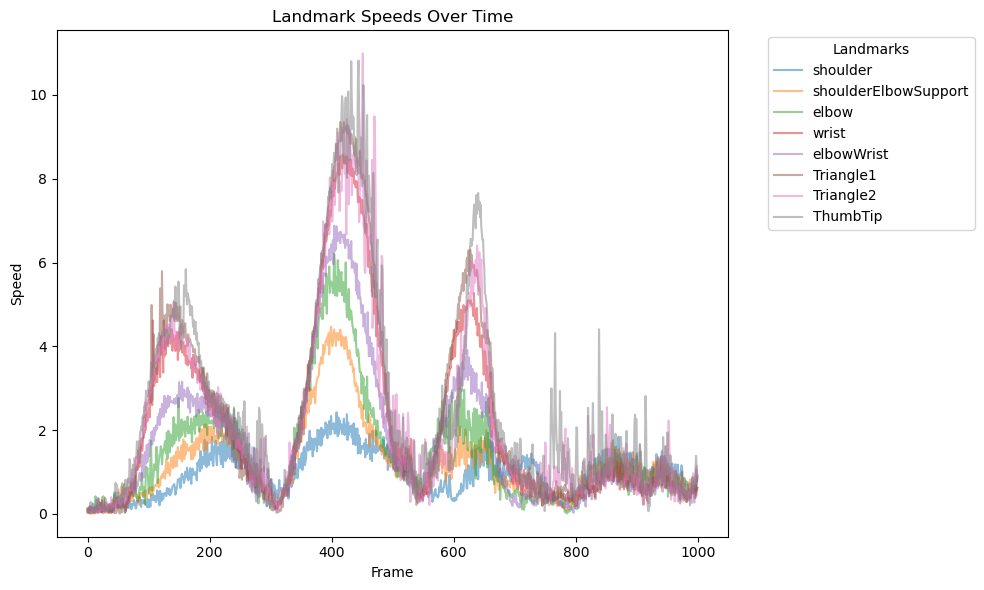

In [9]:
plt.figure(figsize=(10, 6))
for column in speeds_df.columns:
    plt.plot(speeds_df.index[:visualize_frames_count], speeds_df[column][:visualize_frames_count], label=column, alpha=0.5)

plt.title('Landmark Speeds Over Time')
plt.xlabel('Frame')
plt.ylabel('Speed')
plt.legend(title='Landmarks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
def moving_average(data, window_size):
    return data.rolling(window=window_size, min_periods=1, center=True).mean()

# Apply the moving average to each column in the DataFrame
window_size = 500  # Adjust the window size as needed
smoothed_speeds_df = speeds_df.apply(moving_average, window_size=window_size)

In [11]:
smoothed_speeds_df

,shoulder,shoulderElbowSupport,elbow,wrist,elbowWrist,Triangle1,Triangle2,ThumbTip
0,0.688504,0.998106,1.295338,2.096280,1.600485,2.258507,2.198185,2.452234
1,0.690996,1.000966,1.297925,2.094898,1.600821,2.253419,2.196972,2.450494
2,0.695431,1.004545,1.299865,2.093409,1.599990,2.250243,2.194425,2.449071
3,0.697886,1.006627,1.299787,2.089341,1.600371,2.246211,2.193227,2.446157
4,0.699435,1.007874,1.302489,2.087259,1.600297,2.240580,2.189784,2.443092
...,...,...,...,...,...,...,...,...
47883,1.117159,1.687731,2.174474,3.385141,2.647290,3.665718,3.220244,3.338122
47884,1.120905,1.693926,2.182638,3.397950,2.656707,3.680018,3.231515,3.350103
47885,1.124897,1.699907,2.190048,3.410979,2.666782,3.694227,3.243507,3.363024
47886,1.128943,1.706141,2.196942,3.424046,2.676826,3.708509,3.255941,3.375321


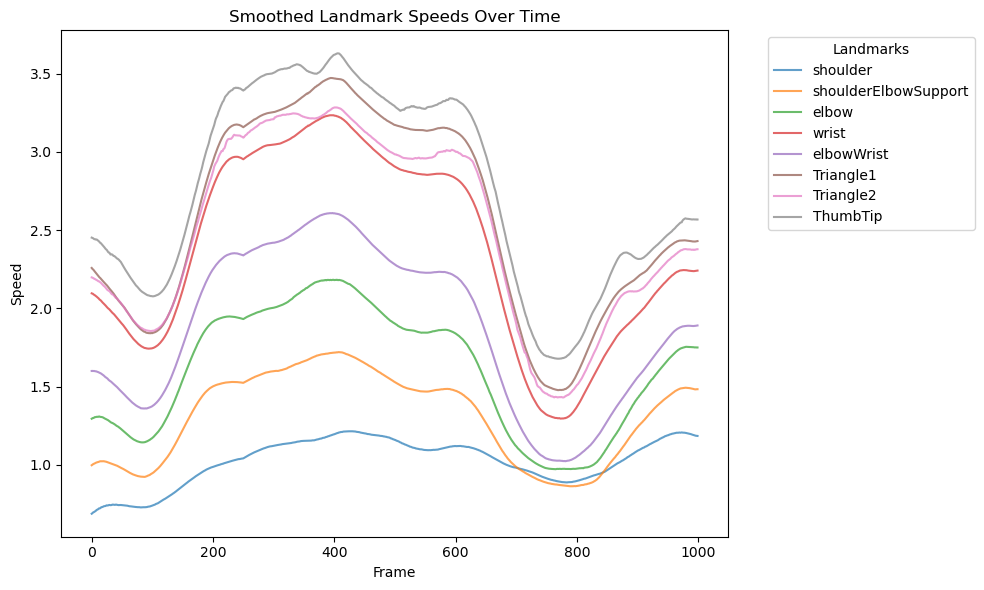

In [12]:
# Plotting smoothed speeds with transparency
plt.figure(figsize=(10, 6))
for column in smoothed_speeds_df.columns:
    plt.plot(smoothed_speeds_df.index[:visualize_frames_count], smoothed_speeds_df[column][:visualize_frames_count], label=column, alpha=0.7)  # Adjust alpha for transparency

plt.title('Smoothed Landmark Speeds Over Time')
plt.xlabel('Frame')
plt.ylabel('Speed')
plt.legend(title='Landmarks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

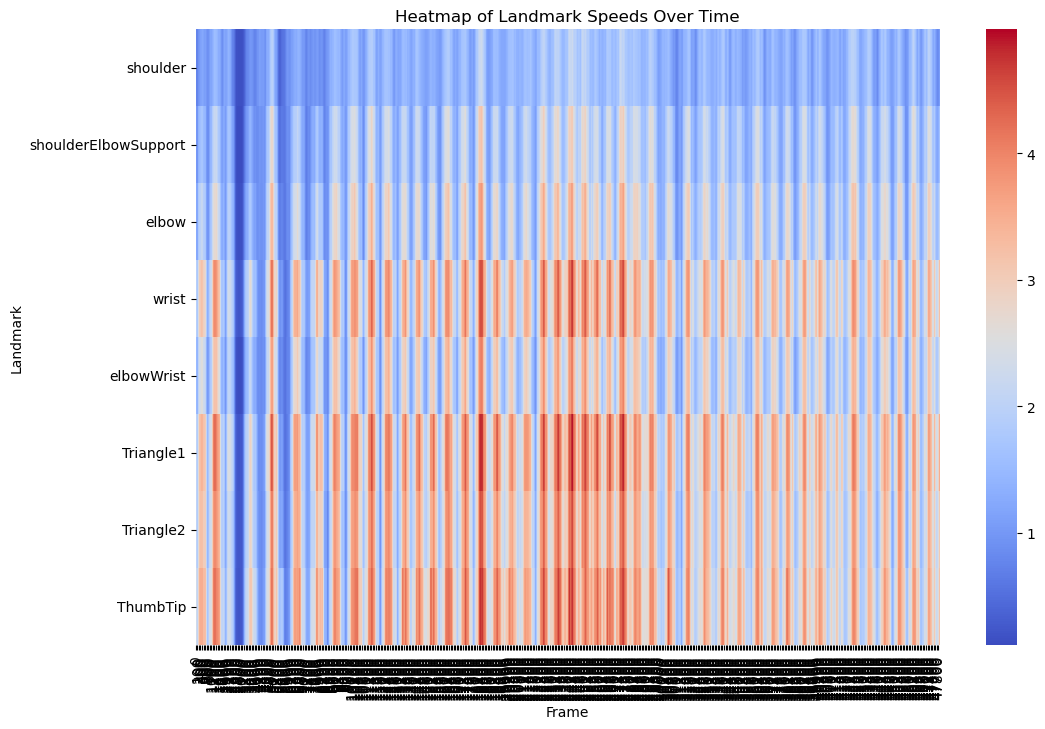

In [13]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(smoothed_speeds_df.T, cmap='coolwarm', cbar=True, xticklabels=100, yticklabels=True)  # xticklabels=100 for showing every 100th label
plt.title('Heatmap of Landmark Speeds Over Time')
plt.xlabel('Frame')
plt.ylabel('Landmark')
plt.show()

In [55]:
trajectories = tables_dict["Trajectories"]

In [63]:
import pandas as pd
import numpy as np

def read_and_process_data(file_path):
    # Load data
    data = pd.read_csv(file_path)

    # Calculate differences between consecutive frames for all columns except 'Frame' and 'Sub Frame'
    position_columns = [col for col in data.columns if col not in ['Frame', 'Sub Frame']]
    differences = data[position_columns].diff().abs()

    # Identify outliers using the IQR method
    Q1 = differences.quantile(0.25)
    Q3 = differences.quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold = Q3 + 1.5 * IQR

    # Create a mask for outliers
    outliers = (differences > outlier_threshold)

    # Interpolate outliers
    for col in position_columns:
        # Interpolating only the outliers
        data.loc[outliers[col], col] = np.nan
        data[col] = data[col].interpolate(method='linear')

    return data

# Usage
processed_data = read_and_process_data('csv/Trajectories.csv')
processed_data.to_csv('csv/processed_Trajectories.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd

def extract_features(data):
    features = pd.DataFrame()
    features['mean_x'] = data['X'].mean(axis=1)
    features['std_x']  = data['X'].std(axis=1)
    features['max_x']  = data['X'].max(axis=1)
    features['min_x']  = data['X'].min(axis=1)
    features['range_x'] = features['max_x'] - features['min_x']
    # Add more features for Y, Z and other dimensions or calculations
    return features

# Apply feature extraction
features = extract_features(processed_data)
